# <center>Tutorial + mini-projet de morphologie mathématique</center>
# <center>revisited</center>
## <center>Hugues Talbot 2021 January 29 </center>


Quelques indications ont été données sur chacune des questions.
Merci de bien vouloir indiquer les noms et prénoms de votre binôme:


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


## pour afficher une seule image
def imview(image, cmap="gray"):
    plt.figure(figsize=(4,4))
    plt.imshow(image,cmap=cmap)
    plt.show()
    
## pour afficher plusieurs images l'une à côté de l'autre
def viewlist(images,cmap="gray"):
    plt.figure(figsize=(12,4))
    columns = 3
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image,cmap=cmap)
    plt.show()

## Section 1:  rappels sur Scikit-image

[Scikit-image](https://scikit-image.org/) est une bibliothèque de traitement d'image similaire en esprit à celle que nous avons crée en cours, mais beaucoup plus rapide. La notion de graphe n'y est pas aussi apparente et le nom des opérateurs est différent.



### Télécharger les images:

In [2]:
## Telechargement des images
import sys

url="http://perso.esiee.fr/~talboth/ISBS/TP/isbs_images.tar.gz"
filename="isbs_images.tar.gz"
if (sys.version_info.major < 3):
    ## python2 syntax
    import urllib2
    response = urllib2.urlopen(url, timeout = 5)
    content = response.read()
    f = open( filename, 'w' )
    f.write( content )
    f.close()
else:
    ## python3 syntax
    import urllib.request
    # Download the file from `url` and save it locally under `file_name`:
    with urllib.request.urlopen(url) as response, open(filename, 'wb') as out_file:
        data = response.read() # a `bytes` object
        out_file.write(data)
    
!ls -l

'ls' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [3]:
## ouverture de l'archive
!tar xvf isbs_images.tar.gz

x Images/
x Images/cell.pgm
x Images/bees/
x Images/tp4/
x Images/tp3/
x Images/tp2/
x Images/code/
x Images/bloodcells.pgm
x Images/projet/
x Images/muscle.pgm
x Images/tp1/
x Images/numbers.pgm
x Images/tp1/meb.pgm
x Images/tp1/cells.pgm
x Images/tp1/circuit.pgm
x Images/projet/vide512.pgm
x Images/projet/poils512.pgm
x Images/projet/acne512.pgm
x Images/code/Nastynumbers.ipynb
x Images/tp2/axoneme.pgm
x Images/tp2/uraniumoxyde.pgm
x Images/tp2/axoneme.tif
x Images/tp3/cell.pgm
x Images/tp3/bloodcells.pgm
x Images/tp3/muscle.pgm
x Images/tp3/numbers.pgm
x Images/tp4/cell.pgm
x Images/tp4/bloodcells.pgm
x Images/tp4/muscle.pgm
x Images/tp4/fondoeil.pgm
x Images/tp4/numbers.pgm
x Images/bees/Bee1.pgm


### section 1.1: Graphe et connectivité

Jusqu'à présent, nous avons défini la connectivité par un graphe. Dans skimage, nous définissons la connectivité par un *élément structurant*

<IPython.core.display.Javascript object>


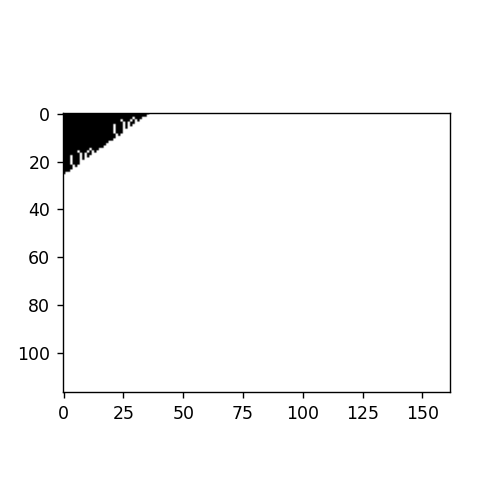

In [7]:
import skimage.io
import skimage.morphology

cell=skimage.io.imread("Images/cell.pgm")
## Generation d'une connectivité sous forme d'un disque de rayon 3
ES1 = skimage.morphology.disk(3)
## dilatation
celldill1 = skimage.morphology.dilation(cell, ES1)
imview(celldill1)

### section 1.2: Rappel des opérateurs vus au TP1



## operateurs de base
erosion
dilation
closing
opening

## operateur connexes
reconstruction

### section 1.2 : documentation de skimage

La documentation de skimage est ici, 
[Documentation de skimage](http://scikit-image.org/docs/0.14.x).

Vous pouvez aussi mettre un point d'interrogation avant ou après le nom d'un operateur pour savoir comment il fonctionne:

exemple : `skimage.morphology.erosion?`

In [ ]:
## essayez
skimage.morphology.erosion?

## Section 2: exercices
Dans cette section, quelques exercices à terminer si possible avant la fin du TP

### Exercice 2.1: detecter les nombres

Lisez l'image `numbers.pgm` et corriger la variation du fond pour détecter les nombres. 

<IPython.core.display.Javascript object>


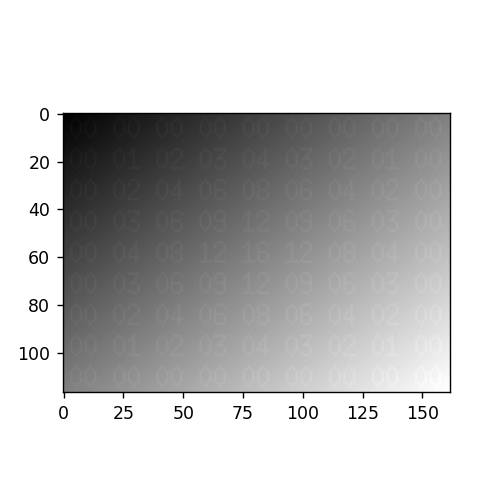

<IPython.core.display.Javascript object>


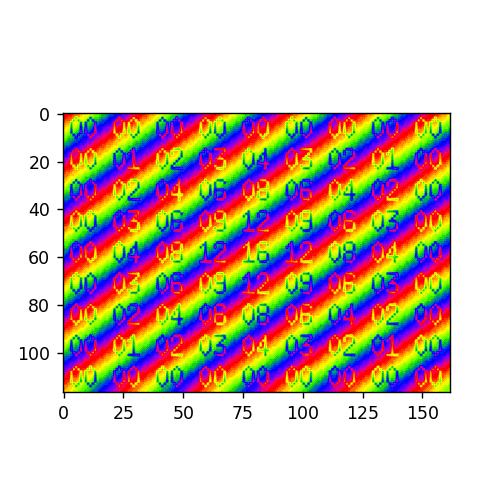

In [5]:
nombres=skimage.io.imread("Images/numbers.pgm")
imview(nombres)
## Les nombrs sont très peu visibles, vous pouvez essayer la colormap "prism" pour peut-être mieux les voir
imview(nombres,"prism")

<IPython.core.display.Javascript object>


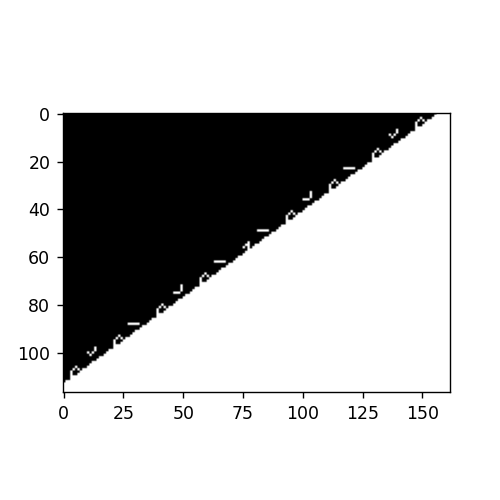

<IPython.core.display.Javascript object>


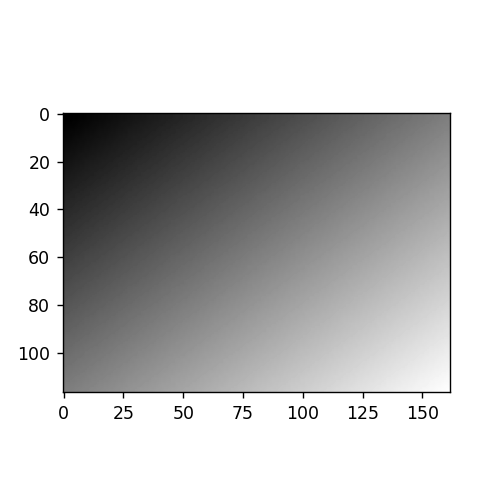

<IPython.core.display.Javascript object>


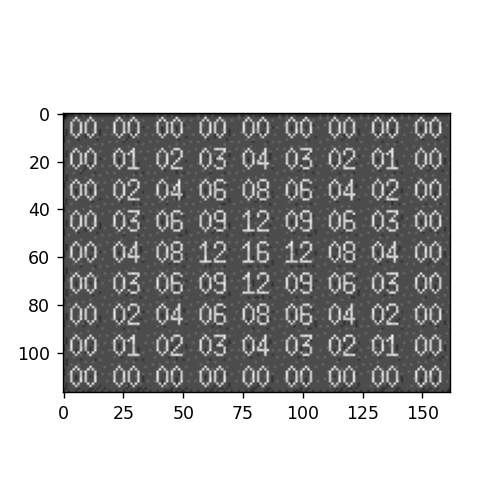

<IPython.core.display.Javascript object>


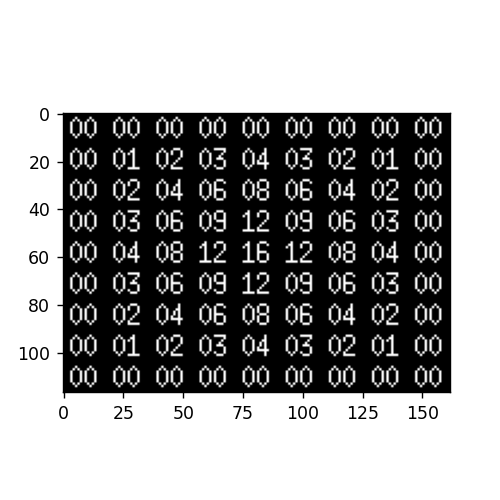

In [75]:
## Correction

#Seuillage
seuil = nombres > 100
imview(seuil)

#Erosion
ES1 = skimage.morphology.disk(3)
nbero = skimage.morphology.erosion(nombres, ES1)
imview(nbero)

#Top hat
TH = nombres - nbero
imview(nbf)

#Binarisation
seuil2 = TH > 4
imview(seuil2)



### Exercice 2.2 Globule rouges
Lisez l'image `Images/bloodcells.pgm`. 

- Segmentez et comptez les globules rouges; 
- éliminez ceux qui touchent les bords; 
- séparez ceux qui se touchent; 
- comptez le nombre de globules rouges, et
- affichez un histogramme de leur aire.

**Indications**: 
- évitez de seuiller l'image dès la première étape. 
- La partie claire centrale des globules est caractéristique: voyez si la procédure de bouchage de trous du 1er TP pourraient être étendue aux niveaux de gris.
- Ensuite, essayez de voir si vous pouvez utiliser cette zone centrale comme une indication.
- N'essayez pas d'avoir un résultat parfait.
- N'oubliez pas d'enlever les globules rouges qui touchent le bord.
- Si possible, séparez les globules rouges qui se touchent.

**fonctions utiles**: 
- filtrage (ouverture, fermetures), 
- top-hat (image-ouverture, fermeture-image), 
- reconstruction  
- fonction distance  
- labellisation 
- ligne de partage des eaux 

Pour le comptage et la mesure de l'aire, utilisez les fonctions issues de scikit-image, exemple

```python
import skimage.measure

measures = skimage.measure.regionprops(bcsln)
areas = [measures[i].area for i in range(len(measures))]
plt.figure()
plt.hist(areas[1:])
```

<IPython.core.display.Javascript object>


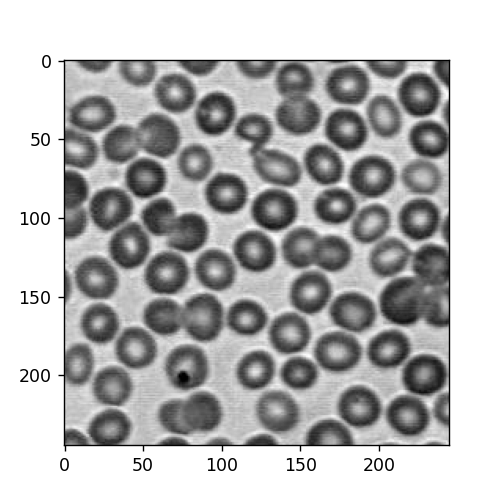

Otsu thresholding value =  139


<IPython.core.display.Javascript object>


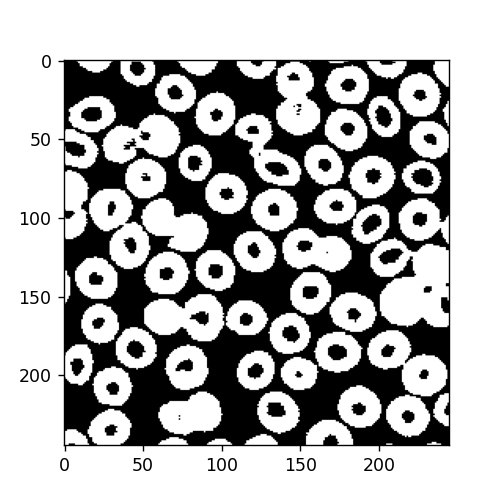

<IPython.core.display.Javascript object>


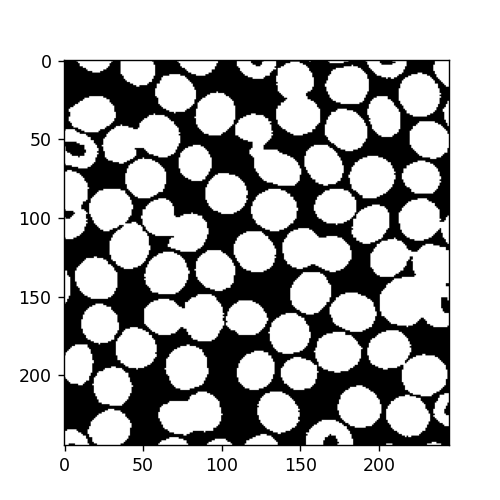

<IPython.core.display.Javascript object>


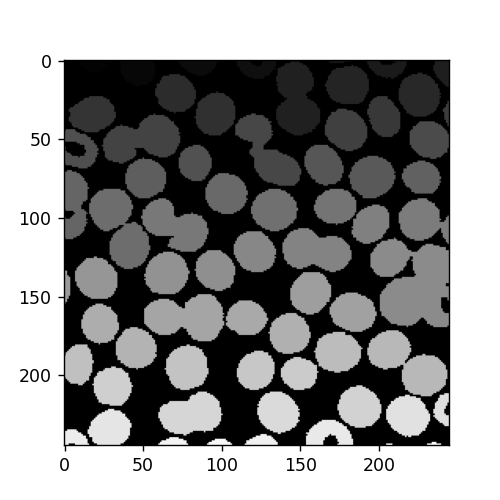

<IPython.core.display.Javascript object>


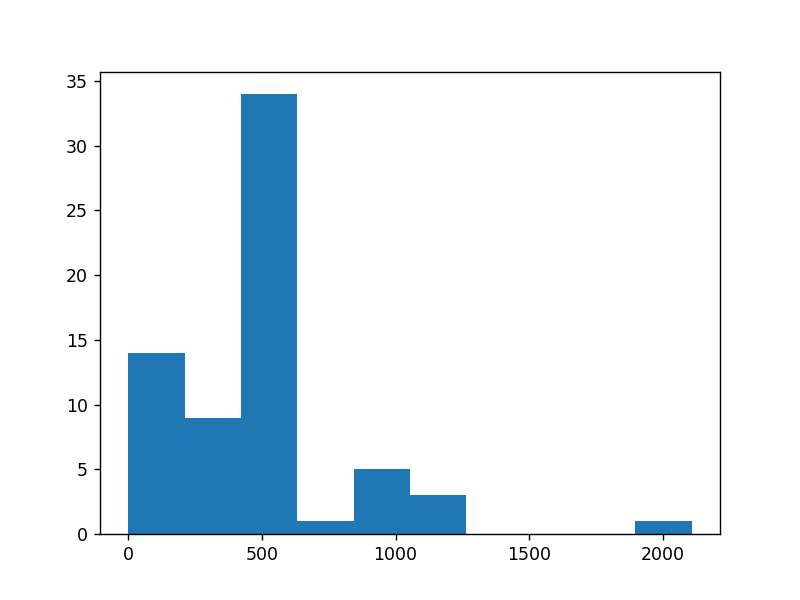

(array([14.,  9., 34.,  1.,  5.,  3.,  0.,  0.,  0.,  1.]),
 array([1.0000e+00, 2.1160e+02, 4.2220e+02, 6.3280e+02, 8.4340e+02,
        1.0540e+03, 1.2646e+03, 1.4752e+03, 1.6858e+03, 1.8964e+03,
        2.1070e+03]),
 <BarContainer object of 10 artists>)

In [85]:
## Correction

import skimage.measure
from scipy import ndimage
from skimage.filters import threshold_otsu

bloodcells = skimage.io.imread("Images/bloodcells.pgm")
imview(bloodcells)


othresh = threshold_otsu(bloodcells)
print ("Otsu thresholding value = ", othresh)
bcs= bloodcells <= othresh

imview(bcs)



<IPython.core.display.Javascript object>


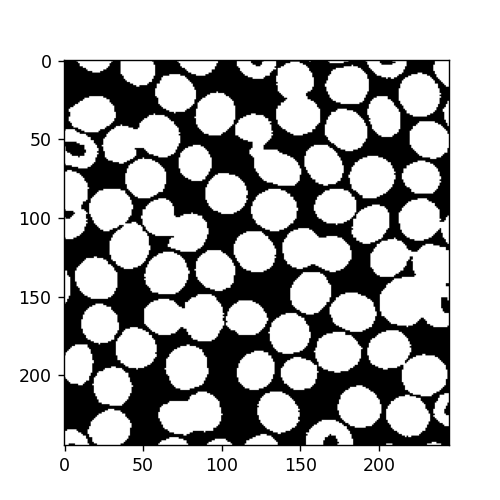

In [96]:
## remplissage des trous, élimination des cellules touchant le bord, etc
seed = np.zeros(bcs.shape)
seed[1:-1, 1:-1] = 1
border = 1-seed

inv_cells = 1-bcs

myborder = np.minimum(border,inv_cells)

#imview(myborder)

fill_cells = (1-skimage.morphology.reconstruction(myborder,inv_cells)).astype(np.uint8)
imview(fill_cells)


fill_cells dtype= uint8
distance type =  float64


<ipython-input-101-39b97e65fa98>:14: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=fill_cells)
c:\users\arnaud\appdata\local\programs\python\python39\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


<IPython.core.display.Javascript object>


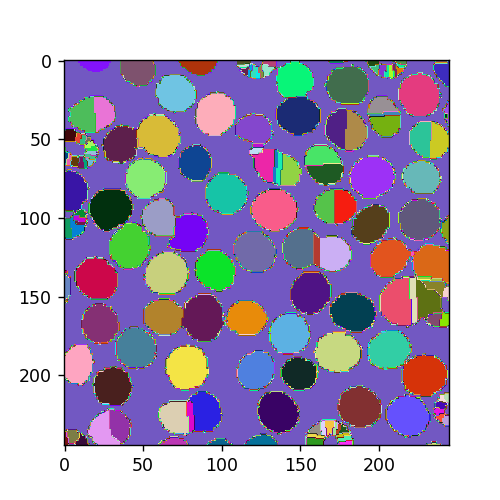

In [101]:
## séparation des objets
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from scipy import ndimage

import matplotlib
randcmap = matplotlib.colors.ListedColormap (np.random.rand(256,3))

distance = ndimage.distance_transform_edt(fill_cells)

print("fill_cells dtype=", fill_cells.dtype)
print("distance type = ", distance.dtype)

local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=fill_cells)
markers = morphology.label(local_maxi)
labels_ws = watershed(-distance, markers, mask=fill_cells)

imview(labels_ws,cmap = randcmap)

<IPython.core.display.Javascript object>


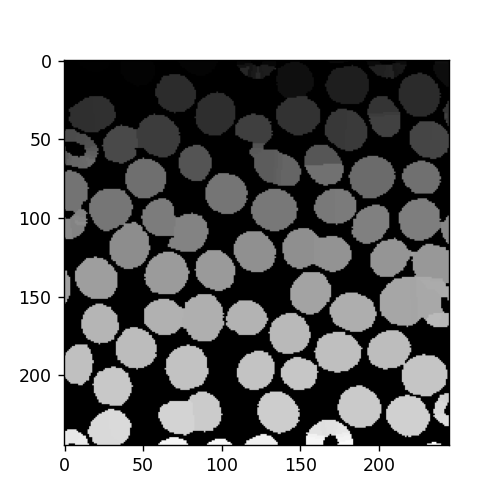

<IPython.core.display.Javascript object>


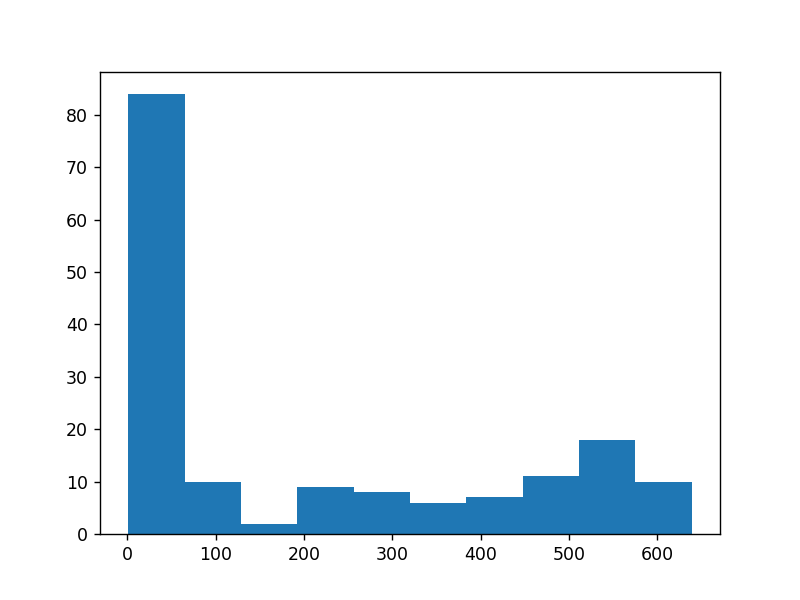

Expected peak at  1421.2230337568676


In [103]:
## fill_cells = ndimage.binary_fill_holes(bcs)


cells_labels = skimage.measure.label(labels_ws, background=0)

imview(cells_labels)

measures = skimage.measure.regionprops(cells_labels)
areas = [measures[i].area for i in range(len(measures))]
plt.figure()
plt.hist(areas[1:])

print ("Expected peak at ", (np.pi*(57-33)/2)**2)

### Exercice 2.3: cellules musculaires

Lire l'image `Images/muscles.pgm`. Segmentez les cellules de muscles, puis 

- éliminez ceux qui touchent les bords; 
- comptez le nombre de cellules, et
- affichez un histogramme de leur aire.

**Indications**
- Ne seuillez pas immédiatement
- Essayez de rehausser les contours blanc des cellules musculaires
- Fonctions utiles:
    - areaopening *(voir doc)*
- Observez que l'intérieur des cellules est plus sombre que leur contour, comme dans une image de gradient. Après rehaussement, essayez de voir si vous pouvez vous en servir, par exemple dans le contexte de la ligne de partage des eaux.

In [ ]:
muscle=skimage.io.imread("Images/muscle.pgm")
imview(muscle)

## Section 3: mini-projet

Le projet est très simple. On considère 3 images, qui sont des images
“angiokits” d’un test biologique, ayant pour but de déterminer si certaines substances ont pour effet ou
non de promouvoir la croissance de cellules endothéliales de vaisseaux sanguins humains. Les cellules sont
cultivées sur un substrat de cellules musculaires, dans une boite de Petri.

Ces substances peuvent entrer dans la composition de médicaments futurs ayant pour effet d’accélérer
la croissance de vaisseaux en cas de blessure, ou bien au contraire de les ralentir pour aider à combattre
certaines tumeurs malignes. Les images sont fournies gracieusement par Sanofi et correspondent à un
problème réel.

### 3.1 : lecture des images

Les images sont situés ici

`Images/projet/vide512.pgm`
`Images/projet/acne512.pgm`
`Images/projet/poils512.pgm`

Les noms sont descriptifs mais n'ont pas de valeur réelle. 

Votre objectif est de produire une fonction qui permet de distinguer les 3 cas: l'image vide est essentiellement une boite de petri où rien n'a poussé. L'image "acne" est une image où la croissance s'est produite de manière compacte, et l'image "poils" où elle s'est produite de manière anisotrope.

On souhaite que vous produisiez une ou plusieurs procédures dont le(s) résultat(s) sont des mesures numériques qui donne des résultats suffisamment différents dans les trois cas pour pouvoir les distinguer. On pourra par exemple penser à des mesures de surfaces, longueurs, etc. Vous devrez justifier vos choix.



In [ ]:
vide=skimage.io.imread("Images/projet/vide512.pgm")
acne=skimage.io.imread("Images/projet/acne512.pgm")
poil=skimage.io.imread("Images/projet/poils512.pgm")

viewlist((vide,acne,poil))

### 3.2 : mise en oeuvre

Mettez en oeuvre les mesures que vous avez décrites. En particulier, vous devez produire une fonction Pink/Python qui prend en entrée une image et donne comme résultat le nombre 0 s’il s’agit d’une image vide, le nombre 1 s’il s’agit d’une image « d’acné »et le nombre 2 s’il s’agit d’une image de « poils ».
Votre procédure pourra être testée sur des *images auquelles vous n’avez pas accès*, pour estimer la
robustesse de votre approche. Donnez le détail et le résultat de chaque opération.

** Quelques indications: **

- Ne seuillez pas l'image immédiatement
- Le fond de l'image n'est pas uniforme, corrigez le (vous savez faire !, voir TD fond d'oeil ou première question de ce TP)
- restreignez l'image à la partie où se trouve les vraies données (le puit)
    - par exemple essayez de segmenter le puit (préférable)
        - un seuillage peut marcher
        - eventuellement suivi d'opérateur de filtrage morphologique pour obtenir un masque binaire du puit
        - inutile de trouver les contours du puit précisément.
        - le résultat doit être un masque binaire
    - si vous avez du mal, restreignez l'image à sa partie centrale. Pour ça vous pouvez utiliser les opérateurs de "slicing" de python: exemple
```python
vide=skimage.io.imread("Images/projet/vide512.pgm")
vidsmall = viden[100:400,100:400]
plt.figure()
plt.imshow(vidsmall)
```
- une fois le fond corrigé et l'image restreinte, vous pouvez seuiller, vous avez a le droit ! 
    - essayez les façons de seuiller automatiques [toutes ces méthodes](http://scikitimage.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html) avec scikit-image.
- si vous avez un masque binaire du puit, utilisez le pour ne garder que les objets sur le puit
- labellisez ce que vous donne le seuillage
- utilisez des mesures diverses : surface, périmètre par exemple, mais aussi peut-être nombre d'objet, excentricité ?
- faites divers scatterplots des mesures que vous obtenez pour voir si vous pouvez trouver un ou plusieurs critère de sélection robuste.

In [ ]:
viden=skimage.io.imread("Images/projet/vide512.pgm")
vidsmall = viden[100:400,100:400]

## Soumission

Merci de soumettre votre résultat par binôme sous la forme d'un notebook python sur la partie "Assignment" de l'équipe Teams.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.morphology
from skimage.filters import threshold_otsu
from skimage.util import crop
from scipy import ndimage as ndi

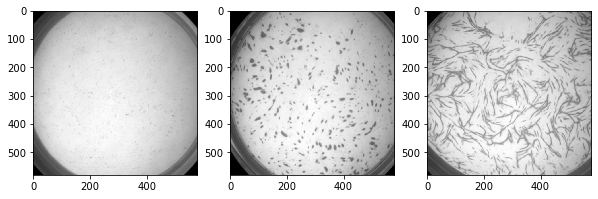

In [2]:
vide=plt.imread("projet/vide512.pgm")
acne=plt.imread("projet/acne512.pgm")
poil=plt.imread("projet/poils512.pgm")

## to plot several images side by side

def viewlist(images,cmap="gray"):
    plt.figure(figsize=(10,8))
    columns = 3
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image,cmap=cmap)
    plt.show()
    
viewlist((vide,acne,poil))

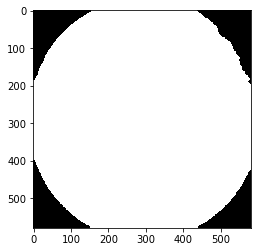

In [47]:
thresh = skimage.filters.threshold_otsu(vide)
img = vide <= thresh
mask = skimage.morphology.opening(img,skimage.morphology.disk(2))
inverted_mask = skimage.util.invert(mask)
eroded_mask = skimage.morphology.erosion(inverted_mask, skimage.morphology.disk(4))

plt.imshow(eroded_mask, cmap='gray')

In [122]:
ES = skimage.morphology.disk(2)
ES_2 = skimage.morphology.disk(1)


In [74]:
def image_processing(img):

    img_ero = skimage.morphology.erosion(img,ES)

    img_geodil_ero = skimage.morphology.reconstruction(img_ero,img, method='dilation') # geodilation
    img_geodil_ero_dil = skimage.morphology.dilation(img_geodil_ero,ES) # dilation

    img_geodil_ero_dil_geoero = skimage.morphology.reconstruction(img_geodil_ero_dil,img_geodil_ero, method='erosion')


    #plt.imshow(img_geodil_ero_dil_geoero,cmap = 'gray')
    
    ## remplissage des trous, élimination des cellules touchant le bord, etc

    othresh = threshold_otsu(img)
    print ("Otsu thresholding value = ", othresh)
    thresh = img <= othresh

    seed = np.zeros(img.shape)
    seed[1:-1, 1:-1] = 1
    border = 1-seed

    inv_img = 1-thresh

    myborder = np.minimum(border,inv_img)

    #imview(myborder)

    fill_cells = (1-skimage.morphology.reconstruction(myborder,inv_img)).astype(np.uint8)
    #plt.imshow(fill_cells, cmap='gray')
    
    # Cropping
    cropped_img = skimage.util.crop(fill_cells,(100,200),(200,200))
    #inverted_cropped_img = skimage.util.invert(cropped_img)
    #plt.imshow(cropped_img, cmap = 'gray')
    
    return cropped_img
    
    
    
processed = image_processing(vide)

Otsu thresholding value =  116


# Processing images

Otsu thresholding value =  116
Otsu thresholding value =  106
Otsu thresholding value =  132


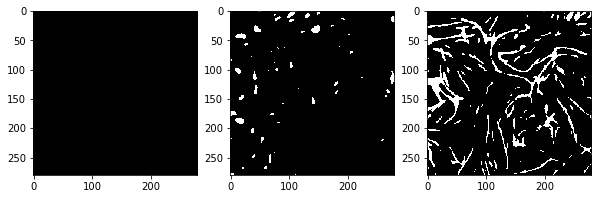

In [75]:
treated_vide = image_processing(vide)
treated_acne = image_processing(acne)
treated_poil = image_processing(poil)

viewlist((treated_vide, treated_acne, treated_poil))

In [100]:
def extract_properties(image):
    
    labels, number_labels = skimage.measure.label(image, return_num = True)
    #print(number_labels)
    #plt.imshow(labels)
    props = skimage.measure.regionprops(labels)
    areas, perimeters = [], []
    
    for label in range(1,number_labels):
        areas.append(props[label].area)
        perimeters.append(props[label].perimeter)
        
    properties = {"aires" : areas, "perimetres" : perimeters }
    
    return properties

In [105]:
acne_properties = extract_properties(treated_acne)
poil_properties = extract_properties(treated_poil)



60
127


# Graphes

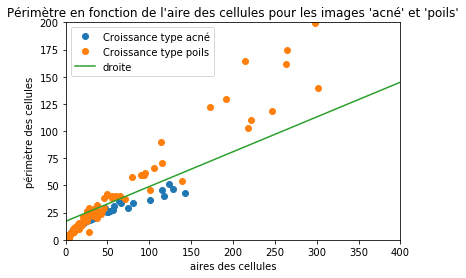

In [107]:
# Courbe séparant les deux nuages de points
x=[i for i in range(0,400)]
y=[0.32*x[i]+17 for i in range(len(x))]

# tracé du graphique
plt.figure()
plt.plot(acne_properties["aires"],acne_properties['perimetres'],'o',label='Croissance type acné')
plt.plot(poil_properties["aires"],poil_properties['perimetres'],'o',label='Croissance type poils')
plt.plot(x,y,label='droite')
plt.xlim(0,400)
plt.ylim(0,200)
plt.title("Périmètre en fonction de l'aire des cellules pour les images 'acné' et 'poils'")
plt.xlabel('aires des cellules')
plt.ylabel('périmètre des cellules')
plt.legend()
plt.show()

# Détermination des types de croissance

In [119]:
def determine_type(image):
    label=[]
    processed_img = image_processing(image)
    aires, perimetres = (extract_properties(processed_img))['aires'], (extract_properties(processed_img))['perimetres'] 
    
# détermination du type d'image

    if len(aires) < 5:
        
        print('Trop peu de cellules sont détectées, l\'image est vide')

    guessed_number_of_poils = 0
        
    for cell in range (len(perimetres)):
        
        if aires[cell] >= 75 and perimetres[cell] >= (0.32*aires[cell]+17): # Verification des critères morphologiques prealablement etablis
            
            guessed_number_of_poils = guessed_number_of_poils + 1
            
    if guessed_number_of_poils >= 0.1*len(perimetres):  # Prise en considerations d'erreurs sur la marge de separation
        
        print('Le type de croissance est : poil')
        
    else :
        
        print('Le type de croissance est : acne')

In [121]:
determine_type(acne)

Otsu thresholding value =  106
60
60
Le type de croissance est : acne
